In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.metrics import *
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')
random.seed(1228)

%matplotlib inline

Скачиваем куски датасета твитов ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/ilkte35m35l38mr/negative.sql).

In [4]:
!wget https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0

--2019-02-14 04:33:46--  https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0
Распознаётся www.dropbox.com (www.dropbox.com)… 162.125.70.1
Подключение к www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: /s/raw/fnpq3z4bcnoktiv/positive.csv [переход]
--2019-02-14 04:33:46--  https://www.dropbox.com/s/raw/fnpq3z4bcnoktiv/positive.csv
Повторное использование соединения с www.dropbox.com:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://uc4965836f21468fbb158e72a343.dl.dropboxusercontent.com/cd/0/inline/AbQ_xrJ6QNVLYgEnkRMZCjf4OdQFbNVh-DcVO19rwO3lGnBKQ60jInG1oWMed09JzCJ_6vq1PkemK1u02t9YMETAVmvPHrQRXeaX9vOBbzsGo6yn3oKTqzQPVBPIXmPc05A/file# [переход]
--2019-02-14 04:33:47--  https://uc4965836f21468fbb158e72a343.dl.dropboxusercontent.com/cd/0/inline/AbQ_xrJ6QNVLYgEnkRMZCjf4OdQFbNVh-DcVO19rwO3lGnBKQ60jInG1oWMed09JzCJ_6vq1PkemK1u02t9YMETAVmvPHrQRXeaX9vOBbzsGo6yn3oKTqzQPVBPI

In [5]:
!wget https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv?dl=0

--2019-02-14 04:33:54--  https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv?dl=0
Распознаётся www.dropbox.com (www.dropbox.com)… 162.125.70.1
Подключение к www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: /s/raw/r6u59ljhhjdg6j0/negative.csv [переход]
--2019-02-14 04:33:55--  https://www.dropbox.com/s/raw/r6u59ljhhjdg6j0/negative.csv
Повторное использование соединения с www.dropbox.com:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://ucb728f58756e81c1cb34adc0952.dl.dropboxusercontent.com/cd/0/inline/AbQiTaQtI0CInxnf4su8genpSYWnbydhhTU5yPvwt4noFfD83GaxL8AdkU6kAeFYhiQFq9J6DMQPKrhC7YwWoZceM38t_1Lqk7qcPhE9saq_Y8CT2GgY4MiCiIG0XkmsPQA/file# [переход]
--2019-02-14 04:33:55--  https://ucb728f58756e81c1cb34adc0952.dl.dropboxusercontent.com/cd/0/inline/AbQiTaQtI0CInxnf4su8genpSYWnbydhhTU5yPvwt4noFfD83GaxL8AdkU6kAeFYhiQFq9J6DMQPKrhC7YwWoZceM38t_1Lqk7qcPhE9saq_Y8CT2GgY4MiCiIG0

Загружаем лемматизированные статьи без стоп-слов и создаем массив текстов

In [9]:
from pymystem3 import Mystem
import re


m = Mystem()


regex = re.compile("[А-Яа-я:=!\)\()A-z\_\%/|]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""



def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "


In [10]:
df_neg = pd.read_csv("negative.csv?dl=0", sep=';', header = None, usecols = [3])
df_pos = pd.read_csv("positive.csv?dl=0", sep=';', header = None, usecols = [3])
df_neg['sent'] = 'neg'
df_pos['sent'] = 'pos'
df_pos['text'] = df_pos[3]
df_neg['text'] = df_neg[3]
df = pd.concat([df_neg, df_pos])
df = df[['text', 'sent']]
%time df.text = df.text.apply(words_only)
%time df.text = df.text.apply(lemmatize)

CPU times: user 1.17 s, sys: 82.5 ms, total: 1.25 s
Wall time: 1.26 s
CPU times: user 21.1 s, sys: 2.96 s, total: 24.1 s
Wall time: 3min 18s


In [11]:
print(df.shape)
df.head()

(226834, 2)


,text,sent
0,на работа быть полный пиддеса :| и так каждый ...,neg
1,коллега сидеть рубиться в Urban terror а я из ...,neg
2,elina_ post как говорить обещаной три год ждат...,neg
3,желать хороший пол тот и удачный посадка я быт...,neg
4,обновлять за какой то леший surf теперь не раб...,neg


In [12]:
df.tail()

,text,sent
114906,спать в родительский дом на свой кровать просы...,pos
114907,RT jebesilofyt: эх мы немного решать сокращать...,pos
114908,что происходить со я когда в эфир proactivefm ...,pos
114909,любимый я подарить ты этот звезда имя какой зв...,pos
114910,Ma_che_rie посмотреть непытайтесьпокинутьомск ...,pos


In [13]:
texts = [df.text.iloc[i].split() for i in range(len(df))]

## Обучение модели в gensim

In [14]:
texts[0]

['на',
 'работа',
 'быть',
 'полный',
 'пиддеса',
 ':|',
 'и',
 'так',
 'каждый',
 'закрытие',
 'месяц',
 'я',
 'же',
 'свихиваться',
 'так',
 'D:']

In [20]:
%%time
from gensim.models import Word2Vec
model = Word2Vec(texts, size=100, window=5, min_count=5, workers=4)
model.save("word2v.model")

CPU times: user 35 s, sys: 384 ms, total: 35.4 s
Wall time: 13.7 s


Загружаем обученную модель (для скорости):

In [21]:
# from gensim.models import Word2Vec
# model = Word2Vec.load("sent_w2v.model") 

In [22]:
model.most_similar("корпоратив")

[('вечеринка', 0.8790329694747925),
 ('ярмарка', 0.8723490238189697),
 ('утренник', 0.8588396310806274),
 ('тус', 0.8572810888290405),
 ('полка', 0.8500125408172607),
 ('сеанс', 0.8462809324264526),
 ('баскет', 0.8453460931777954),
 ('работа!', 0.8449585437774658),
 ('саночки', 0.8420107364654541),
 ('присяга', 0.8393266797065735)]

In [23]:
model.most_similar(positive=["король","добрый"], negative=["хороший"])

[('fcz', 0.7854980230331421),
 ('olegsadovskiy', 0.7789932489395142),
 ('santairis', 0.773546576499939),
 ('sibirianka', 0.7734590768814087),
 ('SokolovaKatya', 0.7720831036567688),
 ('krykbryk', 0.7718716859817505),
 ('_iride', 0.7685304880142212),
 ('gotka', 0.7614989876747131),
 (')имя', 0.7611629962921143),
 ('maslennikovaEle', 0.7610410451889038)]

In [24]:
model.doesnt_match("борщ сметана макароны пирожок котлета".split())

'сметана'

### Визуализация пространства слов 

In [25]:
top_words = []
from nltk import FreqDist
fd = FreqDist()
for text in texts:
    fd.update(text)
for i in fd.most_common(1000):
    top_words.append(i[0])
print(top_words)

['я', 'не', 'и', 'в', 'на', 'что', 'RT', 'а', 'http://t', 'быть', 'ты', 'с', 'как', 'то', 'у', 'это', ':(', 'так', ':', ')', '(', 'но', 'все', 'он', 'ну', 'по', 'мы', ':)', 'мой', 'за', 'весь', 'хотеть', 'такой', ':D', 'уже', 'этот', 'вот', 'же', 'только', 'день', 'да', 'кто', 'еще', 'сегодня', 'она', 'бы', 'когда', 'мочь', 'они', 'вы', 'к', 'очень', 'из', 'просто', 'нет', 'один', 'знать', 'какой', 'от', 'год', 'если', 'теперь', 'любить', 'человек', 'свой', 'co/', 'даже', 'о', 'надо', 'до', 'новый', 'завтра', 'тоже', 'там', 'вс', 'тот', 'вообще', '((', 'для', 'самый', 'хороший', 'себя', 'хорошо', 'сейчас', '))', 'почему', 'делать', 'который', 'думать', 'много', 'раз', 'понимать', 'сказать', '(((', 'блин', 'смотреть', 'без', 'время', 'спать', 'спасибо', 'или', 'тут', 'утро', ')))', 'говорить', 'идти', 'сидеть', 'со', 'пойти', 'давать', 'про', 'ничто', 'писать', 'сделать', 'всегда', 'можно', 'жизнь', 'друг', 'первый', 'скоро', 'сам', 'наш', 'где', 'мама', 'потом', 'школа', '!', 'час', 'т

In [26]:
model['рабочий']

array([-6.8899739e-01, -4.1884166e-01,  1.8252323e+00,  3.3245286e-01,
       -2.8325683e-01, -8.9112747e-01, -1.0992247e+00, -8.4847324e-02,
        8.8313609e-02,  1.6674780e+00, -5.7159460e-01,  8.1526577e-01,
       -1.1574446e+00, -1.4201070e+00, -3.0067289e-01,  1.5431510e-01,
        8.7683767e-01,  1.2126075e+00,  3.8687177e-02,  2.5504106e-01,
        3.0986917e-01,  1.2260607e+00,  9.3413490e-01,  6.6333222e-01,
       -3.3561796e-01,  9.4957495e-01, -4.7615632e-01,  7.8323150e-01,
       -7.6253867e-01, -4.5556337e-02,  6.4010739e-01,  7.4585158e-01,
        4.5682088e-02,  7.1338660e-01,  1.6955661e+00, -2.4028909e-01,
        1.2512521e+00, -3.7182845e-02, -3.6750627e-01, -2.4444741e-01,
       -8.0947094e-02, -3.7759712e-01, -7.8547798e-02,  7.5378031e-01,
       -1.3838271e+00, -2.6430452e+00,  9.6310049e-01,  1.4930714e-02,
       -1.0212673e+00, -2.7084836e-01,  7.3122638e-01,  2.8021011e-01,
        9.4018900e-01, -2.6999953e-01, -1.4451459e-03, -5.3524214e-01,
      

In [27]:
top_words_vec = model[top_words]

In [28]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
top_words_tsne = tsne.fit_transform(top_words_vec)

In [29]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0],
                                    x2=top_words_tsne[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

Loading BokehJS ...

### Кластеризация слов 

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(top_words_vec)

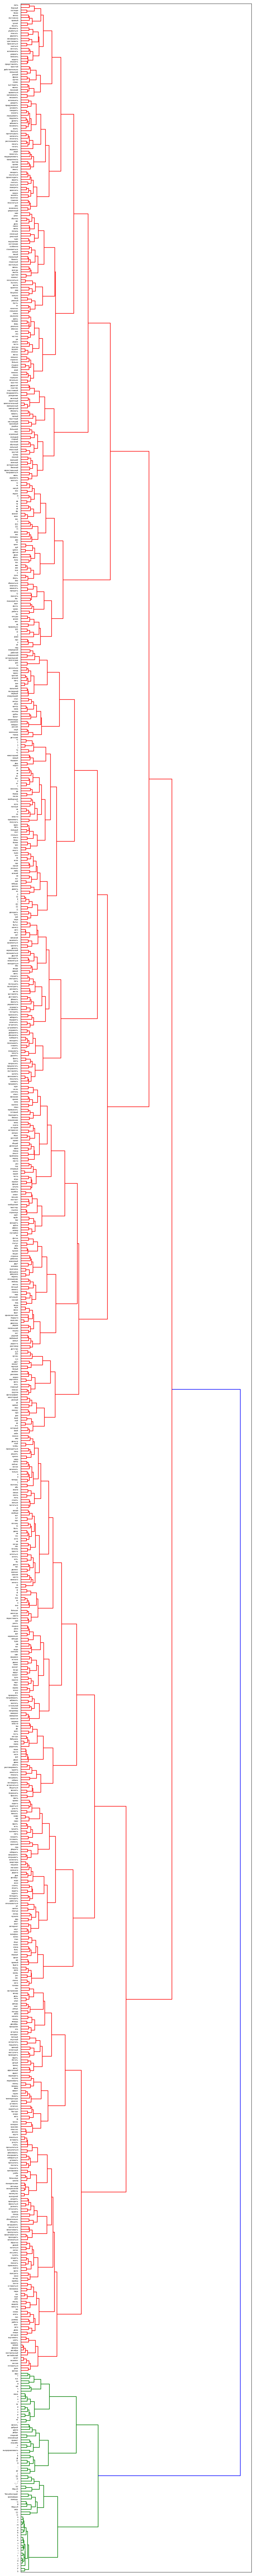

In [31]:
from scipy.cluster.hierarchy import  ward, dendrogram

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(10, 100)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=top_words);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() 

plt.savefig('w2v_cluster.png', dpi=200) #save figure as ward_clusters

## Классификация текстов 

По мотивам http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/

In [32]:
X = df.text.tolist()
y = df.sent.tolist()

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
print ("total train examples %s" % len(y_train))
print ("total test examples %s" % len(y_test))

total train examples 151978
total test examples 74856


In [40]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(list(word2vec.keys())[0])

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [41]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(list(word2vec.keys())[0])

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [42]:
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rfc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])
rfc_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])

In [44]:
rfc_w2v.fit(X_train,y_train)
pred = rfc_w2v.predict(X_test)

Precision:   0.79
Recall:   0.79
F1-measure:   0.79
Accuracy:   0.79
              precision    recall  f1-score   support

         neg       0.77      0.81      0.79     36941
         pos       0.81      0.76      0.78     37915

   micro avg       0.79      0.79      0.79     74856
   macro avg       0.79      0.79      0.79     74856
weighted avg       0.79      0.79      0.79     74856



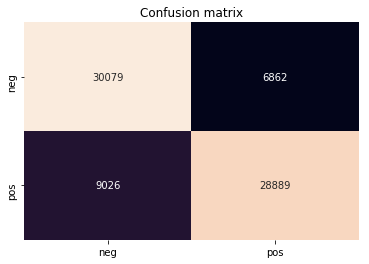

In [45]:
print("Precision: {0:6.2f}".format(precision_score(y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))
labels = rfc_w2v.classes_


sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [46]:
rfc_w2v_tfidf.fit(X_train,y_train)
pred = rfc_w2v_tfidf.predict(X_test)

Precision:   0.83
Recall:   0.83
F1-measure:   0.83
Accuracy:   0.83
              precision    recall  f1-score   support

         neg       0.81      0.85      0.83     36941
         pos       0.85      0.81      0.83     37915

   micro avg       0.83      0.83      0.83     74856
   macro avg       0.83      0.83      0.83     74856
weighted avg       0.83      0.83      0.83     74856



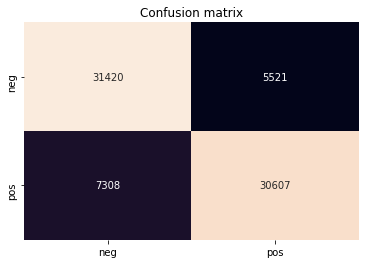

In [47]:
print("Precision: {0:6.2f}".format(precision_score(y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))
labels = rfc_w2v.classes_


sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

## doc2vec


word2vec с дополнительной меткой id документа

In [48]:
from gensim.models.doc2vec import *

In [49]:
splitted_texts = [text.split() for text in X]
idx = [str(i) for i in range(len(X))]

docs = []
for i in range(len(X)):
    docs.append(TaggedDocument(splitted_texts[i], [idx[i]]))


model = Doc2Vec(size=300, window=5, min_count=5, workers=8, alpha=0.025, min_alpha=0.01, dm=0)
model.build_vocab(docs)
model.train(docs, total_examples=len(docs), epochs=20)

In [50]:
class Doc2VecVectorizer(object):
    def __init__(self, d2v_model):
        self.d2v_model = d2v_model


    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([self.d2v_model.infer_vector(text.split()) for text in X])


rfc_d2v = Pipeline([
    ("word2vec vectorizer", Doc2VecVectorizer(model)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])

rfc_d2v.fit(X_train,y_train)
pred = rfc_d2v.predict(X_test)

Precision:   0.69
Recall:   0.69
F1-measure:   0.69
Accuracy:   0.69
              precision    recall  f1-score   support

         neg       0.67      0.72      0.69     36941
         pos       0.71      0.65      0.68     37915

   micro avg       0.69      0.69      0.69     74856
   macro avg       0.69      0.69      0.69     74856
weighted avg       0.69      0.69      0.69     74856



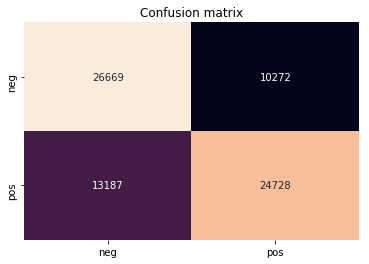

In [51]:
print("Precision: {0:6.2f}".format(precision_score(y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))
labels = rfc_w2v.classes_


sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

## fasttext 

Слово $w$ представляем символьными $n$-грамами: 

$n=3$, $G_{where} = \_wh, whe, her, re\_, \_where\_$

$sim_{w2v}(u,v) = <u,v>$


$ sim_{ft} (u,v) = \sum_{e \in G_u} \sum_{g \in G_v} <e,v>$


https://github.com/facebookresearch/fasttext

In [35]:
import fasttext

with open('data.train.txt', 'w+') as outfile:
    for i in range(len(X_train)):
        outfile.write('__label__' + y_train[i] + ' '+ X_train[i] + '\n')
    

with open('test.txt', 'w+') as outfile:
    for i in range(len(X_test)):
        outfile.write('__label__' + y_test[i] + ' ' + X_test[i] + '\n')

In [36]:
classifier = fasttext.supervised('data.train.txt', 'model')
result = classifier.test('test.txt')
print('P@1:', result.precision)
print('R@1:', result.recall)
print('Number of examples:', result.nexamples)

P@1: 0.917922411029176
R@1: 0.917922411029176
Number of examples: 74856


Precision:   0.92
Recall:   0.92
F1-measure:   0.92
Accuracy:   0.92
             precision    recall  f1-score   support

        neg       0.92      0.92      0.92     36847
        pos       0.92      0.92      0.92     38009

avg / total       0.92      0.92      0.92     74856



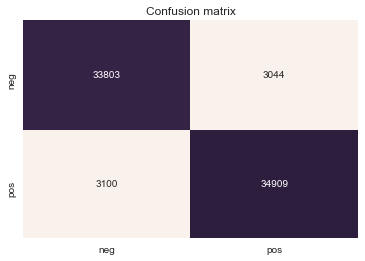

In [38]:
pred = classifier.predict(X_test)


print("Precision: {0:6.2f}".format(precision_score(y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, [i[0] for i in pred]))
labels = rfc_w2v.classes_


sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()